In [1]:
ls ../rarefy.csv


../rarefy.csv


In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [13]:
#df = pd.read_csv('../rarefy.k=rarefy.k=21.s1000.10m.csv')
df = pd.read_csv('../../2025-other-pig-bins/all-bins.rarefy.csv')

In [14]:
df

,iteration,position,sample,new_kmers,cumulative_kmers
0,0,1,NNF_SINGLE_MAG17 s__Phil1 sp004558525 (352_ekd...,206,206
1,0,2,NNF_KU_MAG531 s__Mitsuokella multacida (vaevae...,256,462
2,0,3,NNF_VAMB_MAG2151 unknown (369_ekdn230018988_va...,151,613
3,0,4,NNF_SEMIBIN2_MAG455 s__Cryptobacteroides sp022...,262,875
4,0,5,NNF_UCD_MAG1862 s__Holdemanella porci (Esben34...,201,1076
...,...,...,...,...,...
1027895,99,10275,NNF_UCD_MAG432 s__Ruminococcoides sp946414115 ...,0,242858
1027896,99,10276,NNF_SEMIBIN2_MAG2032 s__Anaerobutyricum soehng...,8,242866
1027897,99,10277,NNF_SEMIBIN2_MAG995 s__UBA1227 sp900545655 (31...,1,242867
1027898,99,10278,NNF_KU_MAG395 s__Onthousia sp000438295 (vaevae...,4,242871


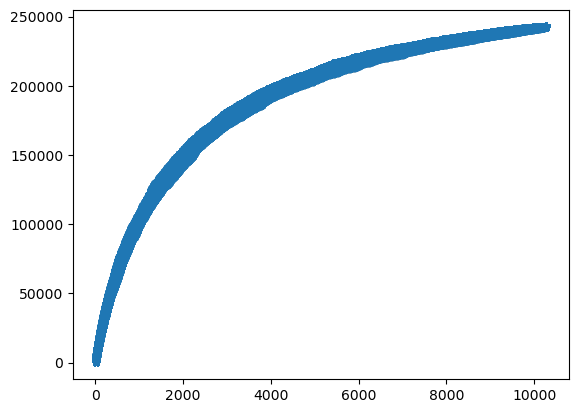

In [15]:
plt.plot(df.position, df.cumulative_kmers, '*')

In [16]:
df = df.sort_values(by=["iteration", "position"])

# Group by iteration and calculate cumulative kmers per sample position
df["cumulative"] = df.groupby("iteration")["new_kmers"].cumsum()

# Calculate mean and std across iterations at each sample position
summary = df.groupby("position")["cumulative"].agg(["mean", "std"]).reset_index()
summary

,position,mean,std
0,1,215.73,63.663232
1,2,420.84,77.268876
2,3,631.08,110.314397
3,4,843.76,124.480668
4,5,1045.69,134.902411
...,...,...,...
10274,10275,242855.77,31.772504
10275,10276,242859.40,30.678193
10276,10277,242863.79,26.850237
10277,10278,242867.22,25.151894


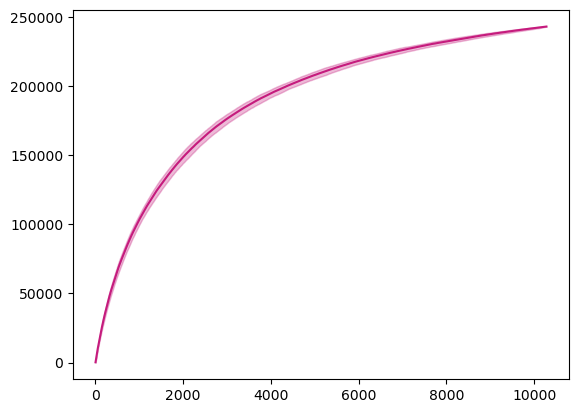

In [17]:
x_kmer = summary["position"]
mean_kmer = summary["mean"]
std_kmer = summary["std"]

plt.plot(x_kmer, mean_kmer, color="#c51b7d", label="Mean cumulative k-mers")
plt.fill_between(x_kmer, mean_kmer-2*std_kmer, mean_kmer+2*std_kmer, alpha=0.3, color="#c51b7d")
